### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\nicko\OneDrive\Desktop\ML_AI Program\Module 5\coupons.csv')

In [18]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [19]:
data.info()

columns_missing_data = data.columns[data.isnull().any()]

for column in columns_missing_data:
    print("Column '{}' has missing data.".format(column))

# Remove duplicates
data = data.drop_duplicates()
print('<===car value Counts===>')
print(data['car'].value_counts())

print('<===bar value Counts===>')
print(data['Bar'].value_counts())

print('<===CoffeeHouse value Counts===>')
print(data['CoffeeHouse'].value_counts())

print('<===CarryAway value Counts===>')
print(data['CarryAway'].value_counts())

print('<===RestaurantLessThan20 value Counts===>')
print(data['RestaurantLessThan20'].value_counts())

print('<===Restaurant20To50 value Counts===>')
print(data['Restaurant20To50'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# Remove duplicates
data = data.drop_duplicates()
print('<===car value Counts===>')
print(data['car'].value_counts())

print('<===bar value Counts===>')
print(data['Bar'].value_counts())

print('<===CoffeeHouse value Counts===>')
print(data['CoffeeHouse'].value_counts())

print('<===CarryAway value Counts===>')
print(data['CarryAway'].value_counts())

print('<===RestaurantLessThan20 value Counts===>')
print(data['RestaurantLessThan20'].value_counts())

print('<===Restaurant20To50 value Counts===>')
print(data['Restaurant20To50'].value_counts())

def mapping_missing_data_columns(df, columns):
    mapping = {
        '1~3': 1,
        '4~8': 2,
        'less1': 3,
        'gt8': 4,
        'never': 5
    }
    mean_values = {}

    for column in columns:
        df[column + '_Int'] = df[column].map(mapping)
        mean_values[column] = int(df[column + '_Int'].mean())

        df[column].fillna(df[column + '_Int'].map({v: k for k, v in mapping.items()}), inplace=True)
        df[column + '_Int'].fillna(mean_values[column], inplace=True)
    
    return df
columns_with_data = ['CoffeeHouse','CarryAway', 'RestaurantLessThan20','Restaurant20To50','Bar']
data = mapping_missing_data_columns(data, columns_with_data)
data.head()

def convert_to_hours(duration):
    pattern = '(\d+)([dh])'
    matches = findall(pattern, duration)
    
    total_hours = 0
    
    for match in matches:
        value = int(match[0])
        unit = match[1]
        
        if unit == 'd':
            total_hours += value * 24
        elif unit == 'h':
            total_hours += value
            
    return total_hours
data.head()

# convert the coupon types to integers
def map_categories_to_int(df, column):
    category_mapping = {
        'Restaurant(<$20)': 1,
        'Coffee House': 2,
        'Carry out & Take away': 3,
        'Bar': 4,
        'Restaurant($20-$50)': 5
    }
    df[column + '_Int'] = df[column].map(category_mapping)
    return df

# convert the coupon description to integer store into expiration_hours column
data = map_categories_to_int(data, 'coupon')


data.head()

# converting age to ingeger and storing in different column
def convert_age_to_int(df, column):
    # Define a mapping for 'below21' and '50plus' values
    age_mapping = {
        'below21': 20,
        '50plus': 50
    }

    # Convert the age column to numeric
    df['age_int'] = pd.to_numeric(df[column], errors='coerce')

    # Fill 'below21' and '50plus' values using the mapping
    df['age_int'].fillna(df[column].map(age_mapping), inplace=True)

    # Convert the column to integer data type, handling non-finite values
    #df['age_int'] = df[column].apply(lambda x: int(x) if np.isfinite(x) else np.nan)

    return df


data = convert_age_to_int(data, 'age')
data.head(2)
data['age'].value_counts()

# convering income into integer 
def convert_income_to_numeric(df, column):
    # Extract minimum and maximum values from the income column
    df[['min_income', 'max_income']] = df[column].str.extract(r'\$(\d+) - \$(\d+)')
    
    # Convert minimum and maximum income columns to numeric values
    df['min_income'] = pd.to_numeric(df['min_income'], errors='coerce')
    df['max_income'] = pd.to_numeric(df['max_income'], errors='coerce')
    
    # Calculate the average income
    df['average_income'] = (df['min_income'] + df['max_income']) / 2
    
    # Drop unnecessary columns
    df.drop(columns=['min_income', 'max_income'], inplace=True)
    
    return df

data = convert_income_to_numeric(data, 'income')
data.head()


<===car value Counts===>
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64
<===bar value Counts===>
never    5178
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: Bar, dtype: int64
<===CoffeeHouse value Counts===>
less1    3362
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: CoffeeHouse, dtype: int64
<===CarryAway value Counts===>
1~3      4645
4~8      4242
less1    1849
gt8      1572
never     152
Name: CarryAway, dtype: int64
<===RestaurantLessThan20 value Counts===>
1~3      5356
4~8      3553
less1    2071
gt8      1282
never     219
Name: RestaurantLessThan20, dtype: int64
<===Restaurant20To50 value Counts===>
less1    6041
1~3      3266
never    2122
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_opp,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,coupon_Int,age_int,average_income
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,1,5.0,2.0,2.0,1.0,5.0,NaN,21.0,43749.5
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,5.0,2.0,2.0,1.0,5.0,2.0,21.0,43749.5
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,5.0,2.0,2.0,1.0,5.0,3.0,21.0,43749.5
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,5.0,2.0,2.0,1.0,5.0,2.0,21.0,43749.5
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,5.0,2.0,2.0,1.0,5.0,2.0,21.0,43749.5


4. What proportion of the total observations chose to accept the coupon? 



In [21]:
acceptance_proportion = data['Y'].mean()

print("Proportion of total observations that chose to accept the coupon: {:5%}".format(acceptance_proportion))

Proportion of total observations that chose to accept the coupon: 56.756542%


5. Use a bar plot to visualize the `coupon` column.

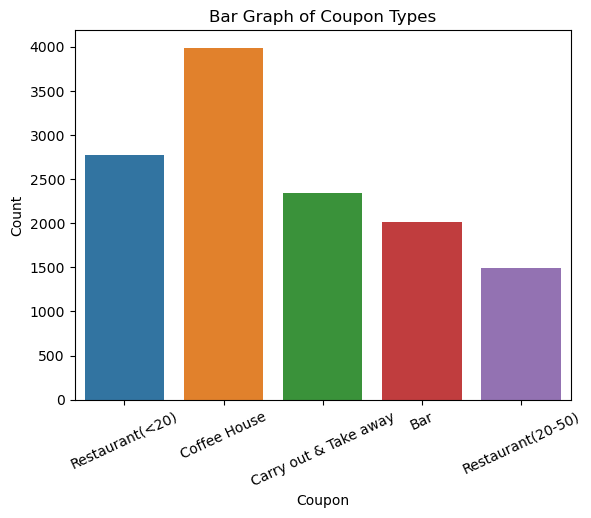

In [22]:
sns.countplot(data=data, x='coupon')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Bar Graph of Coupon Types')
plt.xticks(rotation=25)
plt.show()

6. Use a histogram to visualize the temperature column.

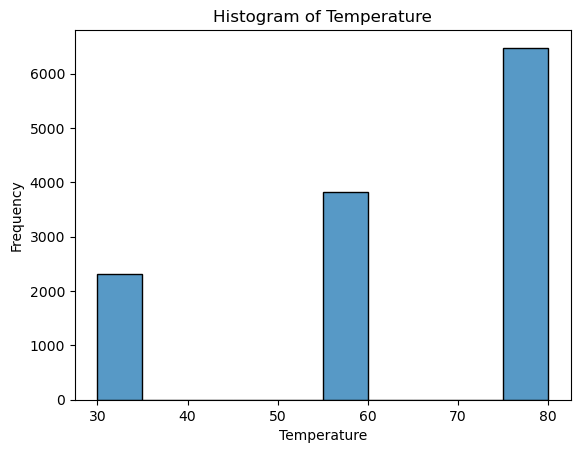

In [23]:
sns.histplot(data=data, x='temperature', bins=10,kde=False)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [24]:
df_barcoupons = data.loc[data['coupon'].str.contains('Bar')]
df_barcoupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_opp,Y,CoffeeHouse_Int,CarryAway_Int,RestaurantLessThan20_Int,Restaurant20To50_Int,Bar_Int,coupon_Int,age_int,average_income
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1,0,5.0,2.0,2.0,1.0,5.0,4.0,21.0,43749.5
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0,1,5.0,2.0,2.0,1.0,5.0,4.0,21.0,43749.5
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1,0,5.0,2.0,2.0,1.0,5.0,4.0,21.0,43749.5
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,1,1,3.0,2.0,2.0,3.0,5.0,4.0,21.0,68749.5
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,1,3.0,2.0,2.0,3.0,5.0,4.0,21.0,68749.5


2. What proportion of bar coupons were accepted?


In [25]:
acceptance_proportion = df_barcoupons['Y'].mean()

print("Proportion of total observations that accepted the Bar coupon: {:5%}".format(acceptance_proportion))

Proportion of total observations that accepted the Bar coupon: 40.995025%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for those who went to a bar 3 or fewer times: 0.65
Acceptance rate for those who went to a bar more than 3 times: 0.77
Group 2 has a 15.80% higher acceptance rate than Group 1.


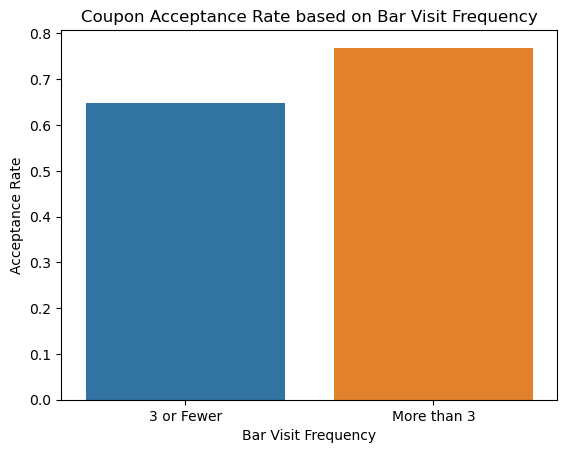

In [26]:
# function to calculate the acceptance rate
def compare_acceptance_rates(acceptance_rate_group1, acceptance_rate_group2):
    # Calculate the percentage difference
    percentage_difference = ((acceptance_rate_group1 - acceptance_rate_group2) / acceptance_rate_group2) * 100

    # Compare the percentage difference
    if percentage_difference > 0:
        result = f"Group 1 has a {percentage_difference:.2f}% higher acceptance rate than Group 2."
    elif percentage_difference < 0:
        result = f"Group 2 has a {abs(percentage_difference):.2f}% higher acceptance rate than Group 1."
    else:
        result = "Both groups have equal acceptance rates."

    return result

less_than_4 = df_barcoupons[df_barcoupons['Bar'] == '1~3']  # Subset for those who went to a bar 3 or fewer times
more_than_4 = df_barcoupons[df_barcoupons['Bar'].isin(['4~8', 'gt8'])]  # Subset for those who went to a bar more than 3 times

# Calculate the acceptance rate for each group
acceptance_rate_less_than_4 = less_than_4['Y'].mean()
acceptance_rate_more_than_4 = more_than_4['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times: {acceptance_rate_less_than_4:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {acceptance_rate_more_than_4:.2f}")

print(compare_acceptance_rates(acceptance_rate_less_than_4,acceptance_rate_more_than_4))
# Define the x-axis values
sns.barplot(x=['3 or Fewer', 'More than 3'], y=[acceptance_rate_less_than_4, acceptance_rate_more_than_4])

# Add labels and title to the plot
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate based on Bar Visit Frequency')

# Show the plot
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for those who went to a bar 1 or more times and age 25+: 0.54
Acceptance rate for those who went to a bar more than 3 times: 0.31
Group 1 has a 78.09% higher acceptance rate than Group 2.


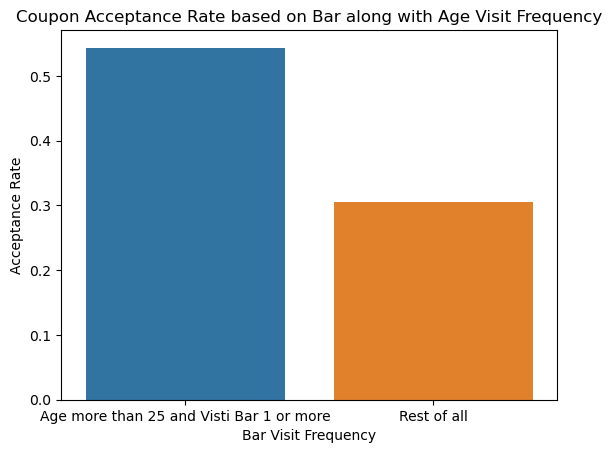

In [27]:
# Getting the age of drivers (using the age_int new column created from age) who are over 25 and have accepted the bar coupon
# as the value counts shows ages more thann 25 are all except 21 and below21 so excluding them
# Bar_Int is the I have computed from Bar. number 5 is allocated to 5 rest are 1-3 etc are the ones.
barcoupons_age_25_filtered = df_barcoupons.query('Bar_Int < 5 and age_int > 25')

# getting all other drivers accepted bar coupons
barcoupons_age_all_others = df_barcoupons[~df_barcoupons.index.isin(barcoupons_age_25_filtered.index)]

# Calculate the acceptance rate for each group
mean_25 = barcoupons_age_25_filtered['Y'].mean()
mean_all = barcoupons_age_all_others['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 1 or more times and age 25+: {mean_25:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {mean_all:.2f}")

# Compare the acceptance rates
print(compare_acceptance_rates(mean_25,mean_all))

# Define the x-axis values
sns.barplot(x=['Age more than 25 and Visti Bar 1 or more', 'Rest of all'], y=[mean_25, mean_all])

# Add labels and title to the plot
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate based on Bar along with Age Visit Frequency')

# Show the plot
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


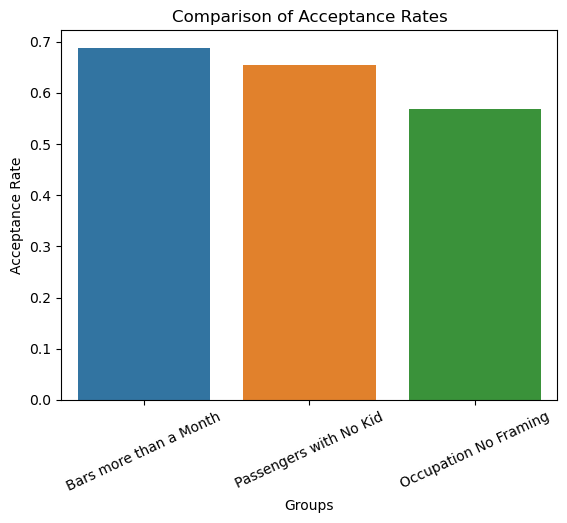

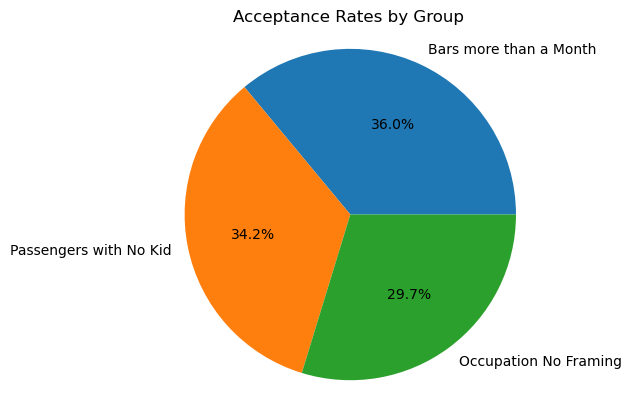

In [28]:
# A group of drivers who go to a bar once a month.
bar_more_once_month_list = df_barcoupons.query('Bar in["1~3","4~8","gt8"]')
# A group of drivers who have passengers with no kids.
drivers_has_passenger_list = data.query('passanger in ["Friend(s)", "Partner"]')
# A group of drivers who are not in farming.
drivers_has_not_farming_list = data.query('occupation not in["farming","fishing","forestry"]')

# Calculate the acceptance rate for each group
bar_more_once_month_list_mean = bar_more_once_month_list['Y'].mean()
drivers_has_passenger_list_mean = drivers_has_passenger_list['Y'].mean()
drivers_has_not_farming_list_mean = drivers_has_not_farming_list['Y'].mean()

group_names = ['bar_more_once_month_list_mean', 'drivers_has_passenger_list_mean', 'drivers_has_not_farming_list_mean']
labels = ['Bars more than a Month', 'Passengers with No Kid', 'Occupation No Framing']

# Create a DataFrame with the acceptance rates and group names
group_data = pd.DataFrame({'Group': group_names,
                     'Acceptance Rate': [bar_more_once_month_list_mean, drivers_has_passenger_list_mean, drivers_has_not_farming_list_mean]})

# Plot the comparison using a bar plot
sns.barplot(x='Group', y='Acceptance Rate', data=group_data, order=group_names)
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Comparison of Acceptance Rates')
plt.xticks(range(len(group_names)), labels,rotation=25)  # Set custom labels on x-axis
plt.show()

acceptance_rates = [bar_more_once_month_list_mean, drivers_has_passenger_list_mean, drivers_has_not_farming_list_mean]

# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates, labels=labels, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Married partner      875
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64


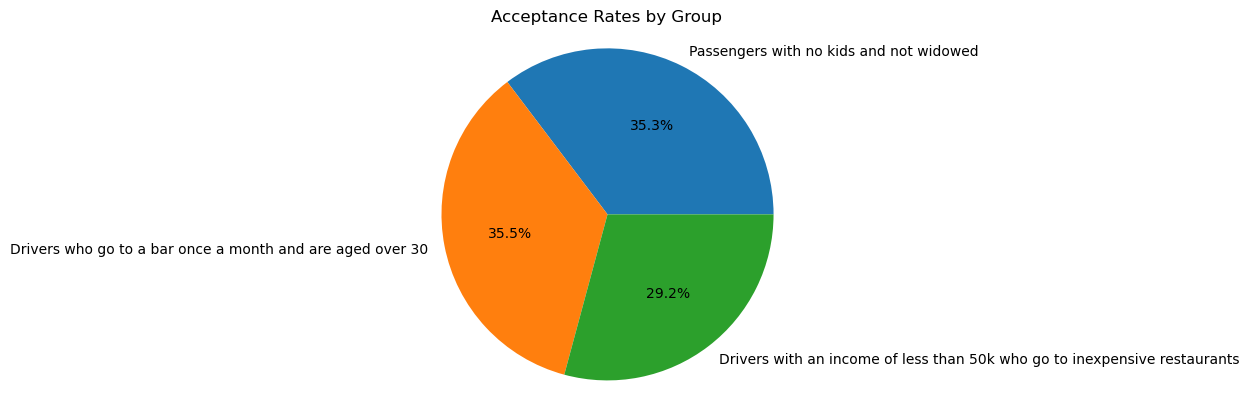

In [29]:
# finding out unique values of marrital status
print(df_barcoupons['maritalStatus'].value_counts())

# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
barcoupons_nokids_windowed = df_barcoupons.query('Bar in["1~3","4~8","gt8"] and passanger in ["Friend(s)", "Partner"] \
                                        and maritalStatus not in["Widowed"]')
#go to bars more than once a month and are under the age of 30
barcoupons_age_lt_20 = df_barcoupons.query('Bar in["1~3","4~8","gt8"] and age_int < 30')

#go to cheap restaurants more than 4 times a month and income is less than 50K
restaurant_income_lt_50 = data.query('average_income < 50000 and RestaurantLessThan20 in ["4~8","gt8"]')

# Calculate the acceptance rate for each group
barcoupons_nokids_windowed_mean = barcoupons_nokids_windowed['Y'].mean()
barcoupons_age_lt_20_mean = barcoupons_age_lt_20['Y'].mean()
restaurant_income_lt_50_mean = restaurant_income_lt_50['Y'].mean()

# creating an array to plot the pie chart
acceptance_rates_u2 = [barcoupons_nokids_windowed_mean, barcoupons_age_lt_20_mean, restaurant_income_lt_50_mean]

# Define the group names and corresponding labels
labels_u2 = ['Passengers with no kids and not widowed', 'Drivers who go to a bar once a month and are aged over 30', 'Drivers with an income of less than 50k who go to inexpensive restaurants']

# Plot the comparison using a pie plot
# Create a pie chart
plt.pie(acceptance_rates_u2, labels=labels_u2, autopct='%1.1f%%')
plt.title('Acceptance Rates by Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who went to the bar more than 3 time have the highest acceptance rate which is 77%. The drivers who were 25 years old or older have an a acceptance rate of 54%. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  